In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from scipy.sparse import csr_matrix
import pickle

# Book Recommendations (Cosine Similarity)

In [2]:
df = pd.read_csv("Books/Ratings.csv", dtype={'Book-Rating': int, "ISBN": str})
users = pd.read_csv("Books/Users.csv")
books =  pd.read_csv("Books/Books.csv")
#df.columns, users.columns, books.columns

C:\Users\shuvo\miniconda3\envs\retail_analytics\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
merged_df = pd.merge(df, users, on='User-ID', how="left")
merged_df = pd.merge(merged_df, books, on='ISBN', how="left")
merged_df.head(1)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [4]:
counts = merged_df["Book-Title"].value_counts().to_frame()
print(merged_df.shape)
print(counts[counts["Book-Title"]>20].shape)
keep = counts[counts["Book-Title"]>20].index.tolist()
merged_df_trx = merged_df[merged_df["Book-Title"].isin(keep)]

(1149780, 12)
(7203, 1)


In [5]:
counts2 = merged_df_trx["User-ID"].value_counts().to_frame()
print(merged_df_trx.shape)
print(counts2[counts2["User-ID"]>10].shape)
keep2 = counts2[counts2["User-ID"]>10].index.tolist()
merged_df_tr = merged_df_trx[merged_df_trx["User-ID"].isin(keep2)]
print(merged_df_tr.shape)

(434153, 12)
(5812, 1)
(321808, 12)


In [6]:
merged_df_tr["Book"] = merged_df_tr["Book-Title"] + \
        " by "+merged_df_tr["Book-Author"]
merged_df_tr.to_pickle("Streamlit Data/Recommendations/merged_df_tr.bz2", protocol=2)

C:\Users\shuvo\miniconda3\envs\retail_analytics\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# ROWS WILL BE USER ID, COLUMNS WILL BE MOVIE TITLE
rating_crosstab = merged_df_tr.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
rating_crosstab.fillna(0, inplace=True)
rating_crosstab.to_pickle("Streamlit Data/Recommendations/rating_crosstab.bz2", protocol=2)
#rating_crosstab = pd.read_csv("Books/rating_crosstab.csv")

In [21]:
# https://predictivehacks.com/item-based-collaborative-filtering-in-python/
import pickle
from sklearn.metrics.pairwise import cosine_similarity
# SVD = TruncatedSVD(n_components=30, random_state=5)
# resultant_matrix = SVD.fit_transform(rating_crosstab)
# print(resultant_matrix.shape)
coss_mat = cosine_similarity(rating_crosstab.T)

np.savez_compressed('Streamlit Data/Recommendations/coss_mat.npz', a = coss_mat)
 

## Start Here

In [8]:
merged_df_tr = pd.read_pickle("Streamlit Data/Recommendations/merged_df_tr.bz2")
rating_crosstab = pd.read_pickle("Streamlit Data/Recommendations/rating_crosstab.bz2")

In [9]:
rating_crosstab

ISBN,0001047647,0001047973,0001048082,0001382608,0002220776,0002242591,0002258358,0002258366,0002558122,0002711567,...,B0000T6KHI,B0000T6KIM,B0000VZEH8,B00011SOXI,B00011SOYM,B0001FZGPI,B0001GDNCK,B0001GMSV2,B0001PIOX4,B000234N76
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
coss_mat = np.load('Streamlit Data/Recommendations/coss_mat.npz')
coss_mat = coss_mat["a"]

In [4]:
search = np.random.choice(list(rating_crosstab.columns))
col_idx = rating_crosstab.columns.get_loc(search)
corr_specific = coss_mat[col_idx]

In [5]:
top_items = pd.DataFrame({'corr_specific':corr_specific, 'ID': rating_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)
top_items = top_items.merge(merged_df_tr[["Book-Title","Book-Author","ISBN"]].drop_duplicates(), left_on="ID", right_on="ISBN",how="left")
common_items = set(merged_df_tr.loc[merged_df_tr["Book-Title"] ==top_items.iloc[0,2], "User-ID"].sort_values()).intersection(set(merged_df_tr.loc[merged_df_tr["Book-Title"] ==top_items.iloc[1,2], "User-ID"].sort_values()))

In [6]:
top_items["title_auth"] = top_items["Book-Title"] + " by "+top_items["Book-Author"]
similar = ", ".join(top_items["title_auth"][1:4].values.tolist())
print("Books similar to",top_items["title_auth"][0],"are:", similar)

Books similar to Moon by James Herbert are: The First Horseman by John Case, The Amber Spyglass (His Dark Materials, Book 3) by Philip Pullman, Phantom of the Auditorium (Goosebumps, No 24) by R. L. Stine


In [3]:
import requests as req
 
h = {'Authorization': 'Sherlock1'}
resp = req.get("https://api2.isbndb.com/book/9781934759486", headers=h)
print(resp.json())

{'message': 'User is not authorized to access this resource with an explicit deny'}


# Market Basket Analysis (Store Data)

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

ModuleNotFoundError: No module named 'mlxtend'

In [22]:
dataset = pd.read_csv("Store Data/store_data.csv")
dataset.fillna('!',inplace=True)
trans = dataset.values.tolist()
for i in range(len(trans)):
    trans[i] = [x for x in trans[i] if not x=='!']

te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
frequent_itemsets = apriori(df, use_colnames=True, min_support = 0.006)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules["antecedents"] = rules["antecedents"].apply(lambda x: " and ".join(list(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: " and ".join(list(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,almonds,eggs,0.020267,0.179733,0.006533,0.322368,1.793593,0.002891,1.210491
1,almonds,mineral water,0.020267,0.238267,0.007467,0.368421,1.546255,0.002638,1.206078
2,avocado,mineral water,0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629
3,burgers,eggs,0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782
4,cake,mineral water,0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074
...,...,...,...,...,...,...,...,...,...
186,tomatoes and mineral water,spaghetti,0.024400,0.174133,0.009333,0.382514,2.196671,0.005084,1.337465
187,spaghetti and turkey,mineral water,0.016533,0.238267,0.006400,0.387097,1.624637,0.002461,1.242828
188,mineral water and turkey,spaghetti,0.019200,0.174133,0.006400,0.333333,1.914242,0.003057,1.238800
189,spaghetti and whole wheat rice,mineral water,0.014133,0.238267,0.006267,0.443396,1.860924,0.002899,1.368538


In [23]:
rules.to_pickle("Streamlit Data/Market Basket Analysis/rules.bz2", protocol=2)

## Start Here

In [10]:
rules = pd.read_pickle("Streamlit Data/Market Basket Analysis/rules.bz2")

In [11]:
lift = 1
conf = 0.4
support = 0.01

chosen = rules[ (rules['lift'] >= lift) & (rules['confidence'] >= conf) & (rules['support'] >= support) ].sort_values("lift", ascending=False).head(20)
chosen

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
154,mineral water and ground beef,spaghetti,0.040933,0.174133,0.017067,0.416938,2.394361,0.009939,1.416431
111,eggs and ground beef,mineral water,0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054
150,milk and ground beef,mineral water,0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756
86,chocolate and ground beef,mineral water,0.023067,0.238267,0.010933,0.473988,1.989319,0.005437,1.448130
131,milk and frozen vegetables,mineral water,0.023600,0.238267,0.011067,0.468927,1.968075,0.005444,1.434328
44,soup,mineral water,0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441
178,pancakes and spaghetti,mineral water,0.025200,0.238267,0.011467,0.455026,1.909736,0.005462,1.397744
176,olive oil and spaghetti,mineral water,0.022933,0.238267,0.010267,0.447674,1.878880,0.004802,1.379138
169,milk and spaghetti,mineral water,0.035467,0.238267,0.015733,0.443609,1.861817,0.007283,1.369061
88,chocolate and milk,mineral water,0.032133,0.238267,0.014000,0.435685,1.828559,0.006344,1.349836


In [12]:
def likelihood(x):
    if x.iloc[0,6]>1:
        criteria = "likely"
    elif x.iloc[0,6]>2:
        criteria = "highly likely"
    elif x.iloc[0,6]>4:
        criteria = "extremely likely"   
    return criteria

if chosen.empty:
    print("No strong associations found")
elif (chosen.iloc[0,6]<=1):
    print("No strong associations found")
else:
    likelihood1 = likelihood(chosen)
    print("If a consumer buys", chosen.iloc[0,0], "then he/she is also", likelihood1 ,"to buy", chosen.iloc[0,1], "." )

If a consumer buys mineral water and ground beef then he/she is also likely to buy spaghetti .


# Customer Segmentation - RFM Analysis

In [28]:
import names
names.get_full_name()

'Maria Boone'

In [42]:
names_list = []
for i in range(0,4380):
    names_list.append(names.get_full_name())
names_list

In [49]:
rfm = pd.read_csv("RFM Analysis\ecom_data_rfm.csv", index_col="Unnamed: 0")
rfm["Name"] = names_list
rfm = rfm[['Name','Frequency', 'Recency', 'Monetary', 'rankR', 'rankF',
       'rankM','Customer_Segment']]

In [50]:
rfm.to_pickle("Streamlit Data/Customer Segmentation/RFM/rfm.bz2", protocol=2)

## Start Here

In [13]:
rfm = pd.read_pickle("Streamlit Data/Customer Segmentation/RFM/rfm.bz2")

In [14]:
rfm

,Name,Frequency,Recency,Monetary,rankR,rankF,rankM,Customer_Segment
1,John Homer,2,358,2.08,2,1,1,Lost Lowest
2,Matthew Alexander,182,35,481.21,5,4,3,Loyal Customers
3,Karen Mcswain,31,108,178.71,5,1,2,Potential Loyalist
4,Rosa Porada,73,51,605.10,5,2,4,Recent High Spender
5,Kristi Thayer,17,343,65.30,2,1,1,Lost Lowest
...,...,...,...,...,...,...,...,...
4376,Vern Henderson,10,310,47.65,2,1,1,Lost Lowest
4377,Raymond Williams,7,213,39.36,3,1,1,About To Sleep
4378,Thomas England,13,40,62.68,5,1,1,New Customers
4379,David Rivira,756,36,1220.93,5,5,5,Loyal Customers


# Customer Segmentation - Clustering

In [47]:
cluster_data = pd.read_csv("Clustering\CC GENERAL.csv")
cluster_data.drop(['CUST_ID'], axis=1, inplace=True)
cluster_data.dropna(inplace=True)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(cluster_data)

In [49]:
from sklearn.cluster import KMeans
for i in range(2,6):
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=23)
    kmeans.fit(X_red)
    cluster_data['cluster_id'] = kmeans.labels_
    cluster_data.to_pickle(f"Streamlit Data\Customer Segmentation\Clustering\cluster_data_{i}.bz2", protocol=2)

2
3
4


211973537537.688

In [83]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(cluster_data)
print(f"Variance Explained by 2 components is {sum(pca.explained_variance_ratio_)*100}%")

Variance Explained by 2 components is 65.3075810980419%


In [99]:
with open('Streamlit Data\Customer Segmentation\Clustering\X_new', 'wb') as X_new_file:
    pickle.dump(X_new, X_new_file)

## Start Here

In [17]:
import pickle
cluster_data = pd.read_pickle("Streamlit Data\Customer Segmentation\Clustering\cluster_data.bz2")
with open('Streamlit Data\Customer Segmentation\Clustering\X_new', 'rb') as X_new_file:
    X_new = pickle.load(X_new_file)

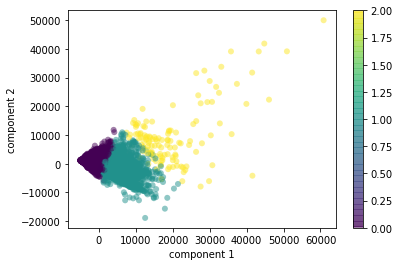

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:, 0], X_new[:, 1],
            c=cluster_data.cluster_id.values, edgecolor='none', alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

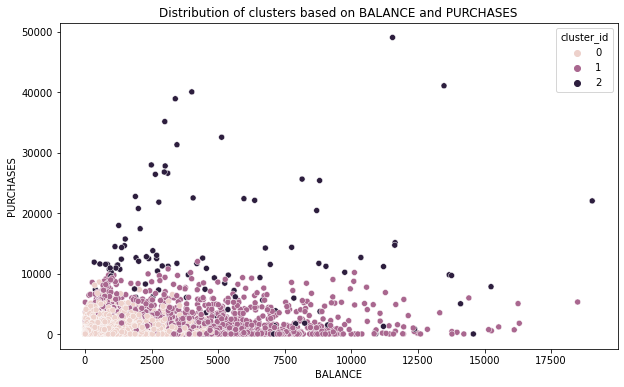

In [20]:
import seaborn as sns
x = 'BALANCE'
y = 'PURCHASES'

plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_data, x=x, y=y, hue='cluster_id')
plt.title(f'Distribution of clusters based on {x} and {y}')
plt.show()

# Churn Analysis

In [1]:
import pandas as pd
churn_df = pd.read_csv('Churn - Ecommerce\ecomchurn.csv')
churn_df.drop(["phone number","state","area code"], axis = 1, inplace=True)

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
# State is string and we want discreet integer values
churn_df['international plan'] = label_encoder.fit_transform(churn_df['international plan'])
churn_df['voice mail plan'] = label_encoder.fit_transform(churn_df['voice mail plan'])

In [3]:
churn_df.shape

(3333, 18)

In [13]:
X = churn_df[['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls']]
y = churn_df['churn']
print(X.shape, y.shape)

(3333, 17) (3333,)


In [14]:

scaler = StandardScaler()
X = scaler.fit_transform(X.values)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

estimators = [
    ('rf', ensemble.RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
     
]
stack = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
joblib.dump(stack, 'Streamlit Data\Churn\\stack.joblib')

['Streamlit Data\\Churn\\stack.joblib']

In [28]:
import joblib
joblib.dump(gbc, 'Streamlit Data\Churn\gbc.joblib')
joblib.dump(nb, 'Streamlit Data\Churn\\nb.joblib')
joblib.dump(dt, 'Streamlit Data\Churn\dt.joblib')
joblib.dump(lr, 'Streamlit Data\Churn\lr.joblib')
joblib.dump(rf, 'Streamlit Data\Churn\\rf.joblib')
joblib.dump(stack, 'Streamlit Data\Churn\\stack.joblib')

['Streamlit Data\\Churn\\stack.joblib']

In [90]:
np.save('Streamlit Data\Churn\X.npy', X)
np.save('Streamlit Data\Churn\y.npy', y)

In [10]:
import pickle
with open('Streamlit Data\Churn\scaler', 'wb') as f:
    pickle.dump(scaler, f)

In [43]:
churn_df[['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls','churn']].sample(10).to_pickle('Streamlit Data\Churn\churn_df_sample.bz2', protocol=2)

## Start here

In [20]:
import joblib
import numpy as np
import pickle
from sklearn import metrics
import pandas as pd
gbc = joblib.load('Streamlit Data\Churn\gbc.joblib')
X = np.load('Streamlit Data\Churn\X.npy')
y = np.load('Streamlit Data\Churn\y.npy')
churn_df_sample = pd.read_pickle("Streamlit Data\Churn\churn_df_sample.bz2")

with open('Streamlit Data\Churn\scaler', 'rb') as f:
    scaler = pickle.load(f)

In [21]:
test = np.array([[65, 0, 0, 0, 129.1, 137, 21.95, 228.5, 83, 19.42, 208.8, 111, 9.4,
       12.7, 6, 3.43, 4]])
gbc.predict(scaler.transform(test)), rf.predict(scaler.transform(test))

(array([ True]), array([ True]))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       566
        True       0.87      0.70      0.78       101

    accuracy                           0.94       667
   macro avg       0.91      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667




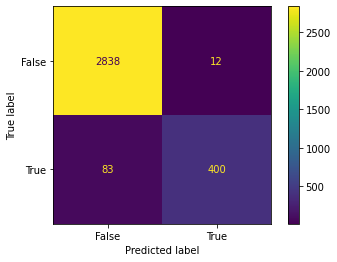

In [35]:
y_pred = stack.predict(X_test)
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y_test, y_pred)))
metrics.plot_confusion_matrix(stack, X, y)

In [13]:
from eli5 import show_prediction, show_weights
# This is PFI
show_weights(gbc,
             targets=[False, True],
             feature_names=['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
             top=len(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'])+1)

Weight,Feature
0.1685 ± 0.2866,total day charge
0.1641 ± 0.2443,customer service calls
0.1200 ± 0.2781,total day minutes
0.1106 ± 0.3447,total intl calls
0.0946 ± 0.1671,international plan
0.0788 ± 0.2918,total eve minutes
0.0651 ± 0.2929,total eve charge
0.0604 ± 0.2118,total intl minutes
0.0543 ± 0.1659,number vmail messages
0.0319 ± 0.1445,voice mail plan


In [14]:
show_prediction(gbc, test[0],
                targets=[False, True],
                feature_names=['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
                show_feature_values=True)

In [ ]:
st.markdown(eli5.show_weights(rf).data, unsafe_allow_html=True)